## **Práctica obligatoria: productivización del modelo**
### **Nuria Olmedilla, Lucia Poyán y Claudia Gemeno**
### January 2025

After successfully setting up the working environment using Docker and implementing a functional Flask API in the first part of this practice, the predictive model was executed to generate results based on the data provided through the API. The API not only allowed processing and storing incoming requests but was also used to log the predictions made by the model, laying the foundation for a detailed analysis of its performance.

In the second part, an exhaustive analysis of the generated predictions is carried out. This analysis includes a review of the prediction distribution and model evaluation using key metrics such as accuracy, recall, and the confusion matrix. Additionally, complementary visualizations, such as the ROC curve and the gain curve, are included to assess the balance between true positives and false positives, as well as the model's discriminative ability.

The purpose of this section is, in addition to validating the model's performance, to provide an interpretation of the results obtained, identify potential areas for improvement, and reflect on the inherent limitations of the approach, particularly regarding the use of PCA and its impact on the interpretability of the predictions. This ensures a comprehensive view of the implementation lifecycle, from the initial technical development to the evaluation of results and generation of insights.

In [ ]:
# Import necessary libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
import numpy as np

In [ ]:
# Load the prediction log file
predictions_log = pd.read_csv(r"C:\Users\claud\Downloads\predictions_log.csv", header=None, names=["Fecha", "Archivo", "Lista"], quotechar='"', on_bad_lines='skip')

# Load the y_test dataset
y_test = pd.read_csv(r"C:\DATOS\DATOS\CUNEF\MASTER\APRENDIZAJE AUTOMATICO\GITHUB\proyecto_final_aprendizaje_automatico\notebook\y_test.csv")

In [14]:
# Display the first few rows to see how the DataFrame has been loaded
print(predictions_log.head())

                        Fecha         Archivo  \
0  2025-01-08 12:32:11.711288  X_test_pca.csv   

                                               Lista  
0  [False, True, False, False, False, False, Fals...  


In [ ]:
# Convert the string that looks like a list into an actual list
predictions_log["Lista"] = predictions_log["Lista"].apply(ast.literal_eval)

In [16]:
# Count the number of True and False values in all the lists
total_true = sum([sum(lista) for lista in predictions_log["Lista"]]) 
total_false = sum([len(lista) - sum(lista) for lista in predictions_log["Lista"]])  

# Calculate the total of True and False values in percentage
total_elements = total_true + total_false  
porcentaje_true = (total_true / total_elements) * 100  
porcentaje_false = (total_false / total_elements) * 100  

# Print the results in percentage
print(f"Percentage of True: {porcentaje_true:.2f}%")
print(f"Percentage of False: {porcentaje_false:.2f}%")

Porcentaje de True: 23.60%
Porcentaje de False: 76.40%


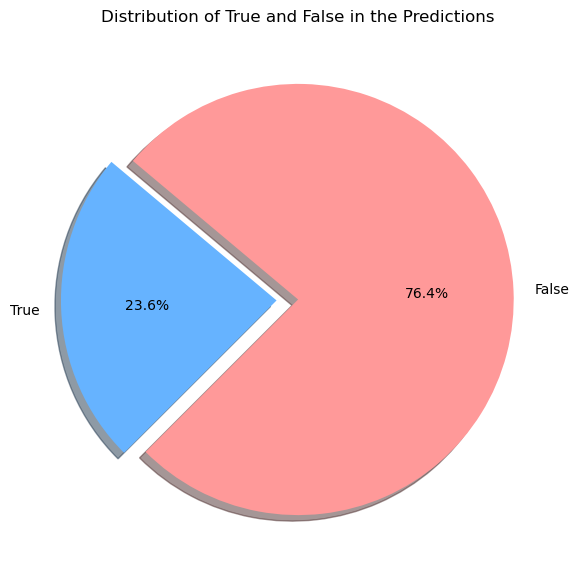

In [49]:
labels = ['True', 'False']
sizes = [porcentaje_true, porcentaje_false]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of True and False in the Predictions')
plt.show()


This section presents the analysis of the distribution of the predictions generated by the implemented model. The objective is to understand how the model classifies the observations in terms of the predicted classes and verify whether the results obtained align with expectations.

A code snippet was implemented to calculate the distribution of predictions into two main classes: True and False. The True class represents cases where customers fail to meet their payments, while the False class corresponds to customers who fulfill their financial obligations.

The resulting distribution shows that the model classifies a larger proportion of observations as customers who meet their payments. This behavior is consistent with the nature of the problem, where it was expected that the class of customers who comply would be more frequent. However, this trend could be influenced by an imbalance in the training data or the model structure.

The relatively smaller percentage of predictions in the True class indicates that the model is more selective in classifying customers as non-compliant.

In [50]:
# Count the number of 0s and 1s in the TARGET column using value_counts
counts = y_test['target'].value_counts(normalize=True) * 100  # Normalize to get percentages

# Print the results
print(f"Percentage of TARGET=0: {counts.get(0, 0):.2f}%")
print(f"Percentage of TARGET=1: {counts.get(1, 0):.2f}%")


Percentage of TARGET=0: 91.95%
Percentage of TARGET=1: 8.05%


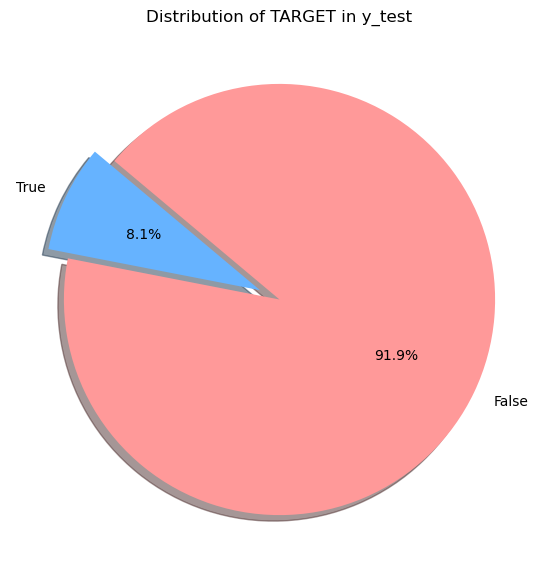

In [51]:
# Labels for the pie chart
labels = ['True', 'False']
sizes = [counts.get(1, 0), counts.get(0, 0)]  
colors = ['#66b3ff', '#ff9999']  
explode = (0.1, 0) 

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of TARGET in y_test')
plt.ylabel('') 
plt.show()


The calculation shows that in the dataset y_test, 91.95% of the cases correspond to customers who meet their payments (TARGET=0), while only 8.05% represent customers who fail to meet their payments (TARGET=1). This class imbalance in the distribution is consistent with what was observed in the model's predictions. In the analysis of the predictions, a higher proportion of customers were also classified as compliant (False), suggesting that the model aligns with the actual distribution of classes in the data.

This result indicates that the model is following the expected pattern, as it classifies the majority of the observations as customers who comply, which is reflected both in the predictions and in the actual class distribution in y_test.

In the analysis, the goal was to observe the distribution of the target classes across different datasets, mainly to identify if there were similar patterns between them. When analyzing the class proportions, it was observed that class 0 (customers who meet their payments) is significantly more frequent in both datasets, while class 1 (customers who do not meet their payments) is considerably less frequent. This similarity in proportions might give the impression that the datasets are consistent in terms of distribution.

However, this observation does not necessarily imply that the model is correctly classifying cases within each class. A similar distribution between the datasets does not guarantee that the model is able to capture and differentiate the relevant patterns that determine whether a customer belongs to class 0 or 1. In other words, even though the proportions may be comparable, there is no evidence that the predictions within those proportions are correct or represent the reality of the problem.

This analysis highlights the importance of not solely relying on the observed proportions as an indicator of the model's performance.



In [52]:
# Flatten the prediction lists and real values for comparison
predictions_flat = [pred for sublist in predictions_log["Lista"] for pred in sublist]

# Use the correct DataFrame for the real values (replace 'y_test' if it's another name)
real_values = y_test['target'].values.tolist()

# Ensure that the predictions and real values have the same length
assert len(predictions_flat) == len(real_values), "The lengths of the predictions and real values do not match"

# Calculate the metrics
accuracy = accuracy_score(real_values, predictions_flat)        
precision = precision_score(real_values, predictions_flat)      
recall = recall_score(real_values, predictions_flat)           
f1 = f1_score(real_values, predictions_flat)                   
cm = confusion_matrix(real_values, predictions_flat)          

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.76
Precision: 0.16
Recall: 0.48
F1 Score: 0.24
Confusion Matrix:
[[12048  3296]
 [  701   643]]


The model's performance evaluation through classification metrics yields the following results:

The ***Accuracy*** of the model is 76%, meaning that, overall, the model correctly classifies 76% of the observations. However, accuracy alone can be misleading, especially in cases where there is a significant imbalance between the target classes, as is the case here.

The ***Precision*** for the positive class (customers who do not meet payments) is 16%, indicating that only 16% of the predictions for class 1 (non-payers) are actually correct. This reflects that the model struggles to be specific in correctly identifying non-payers, which could lead to a high number of false positives.

The ***Recall*** for the positive class is 48%, meaning the model correctly identifies 48% of the customers who actually do not meet their payments. Although this value is better than precision, it is still limited and suggests that the model misses a significant number of non-payment cases.

The ***F1 Score***, which is a metric balancing precision and recall, has a value of 0.24. This reinforces the conclusion that the model has poor performance in handling the positive class, which could be problematic in contexts where correctly identifying this class is critical.

These results reflect that, while the model is relatively good at classifying the majority class (0), its performance in identifying the minority class (1) is limited, which could be a consequence of the imbalance in the training data or the characteristics of the model used.

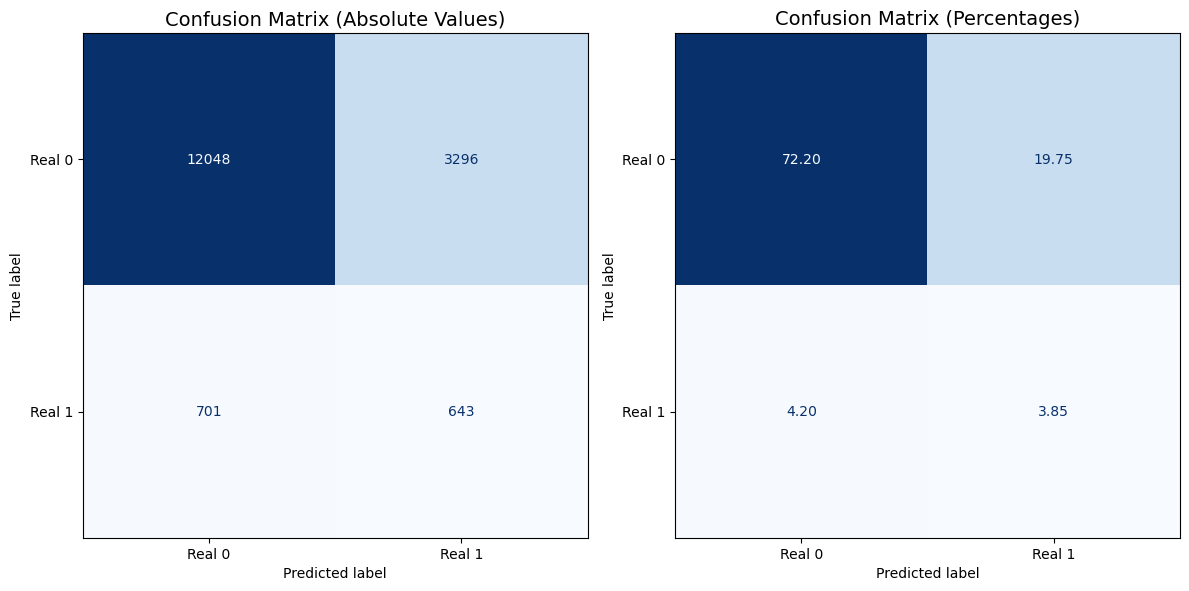

In [53]:
# Calculate the percentage version of the confusion matrix
conf_matrix_percent_fixed = cm / cm.sum() * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix with absolute values
disp_abs = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real 0", "Real 1"])
disp_abs.plot(ax=axes[0], cmap="Blues", values_format="d", colorbar=False)
axes[0].set_title("Confusion Matrix (Absolute Values)", fontsize=14)
axes[0].grid(False)

# Confusion matrix with percentages (formatted to 2 decimal places)
disp_percent_fixed = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percent_fixed, display_labels=["Real 0", "Real 1"])
disp_percent_fixed.plot(ax=axes[1], cmap="Blues", values_format=".2f", colorbar=False)
axes[1].set_title("Confusion Matrix (Percentages)", fontsize=14)
axes[1].grid(False)
plt.tight_layout()
plt.show()


The ***Confusion Matrix*** is a fundamental tool for evaluating the performance of a classification model, as it provides detailed information about the model's correct and incorrect predictions, both in absolute and relative terms. In this case, two versions of the matrix were analyzed: one with absolute values and the other expressed as percentages.

In terms of absolute values, the model correctly classified 12,048 observations from class 0 (Compliant) and 643 observations from class 1 (Non-compliant). However, it also made errors, incorrectly classifying 3,296 observations from class 0 as 1 (false positives) and 701 observations from class 1 as 0 (false negatives).

In percentage terms, 72.20% of the actual class 0 observations were correctly classified as 0, while 19.75% were incorrectly classified as 1. On the other hand, 4.20% of the actual class 1 observations were incorrectly classified as 0, and only 3.85% of these observations were correctly classified as 1.

The analysis shows that the model performs well in correctly identifying the majority class 0 (Compliant), which was expected given the imbalance in the data. However, the model's ability to correctly identify the minority class 1 (Non-compliant) is limited, highlighting the need for adjustments.

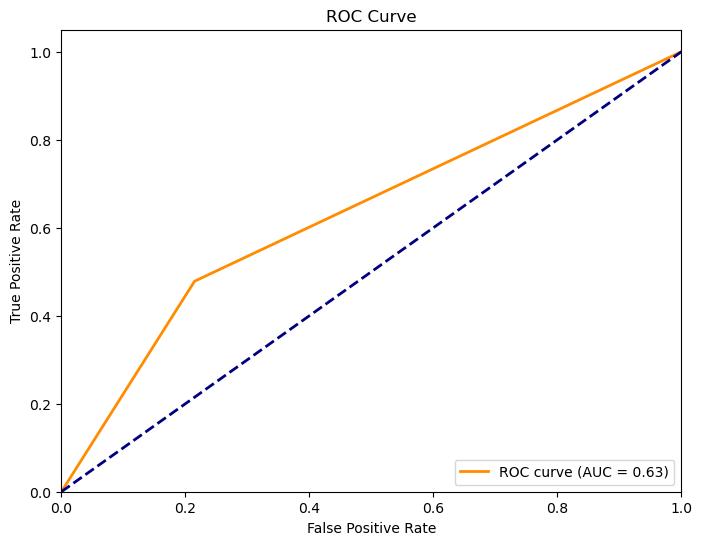

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(real_values, predictions_flat)  
roc_auc = auc(fpr, tpr) 

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve') 
plt.legend(loc="lower right")  
plt.show() 


The presented ROC Curve illustrates the relationship between the true positive rate (sensitivity or recall) and the false positive rate across different decision thresholds of the model. This graph is a key tool for evaluating the model's ability to correctly classify the target classes, regardless of the specific threshold selected.

The area under the curve (AUC) is 0.63, indicating moderate model performance. The AUC value ranges between 0 and 1, where:

- An AUC of 0.5 represents a model with no ability to discriminate between classes, equivalent to random classification.
- An AUC of 1 represents a perfect model.

In this case, an AUC of 0.63 suggests that the model has limited capacity to distinguish between the two classes (Comply and Do Not Comply). While it performs better than random classification, the value is significantly lower than what would be ideal for sensitive applications such as identifying non-compliant customers.

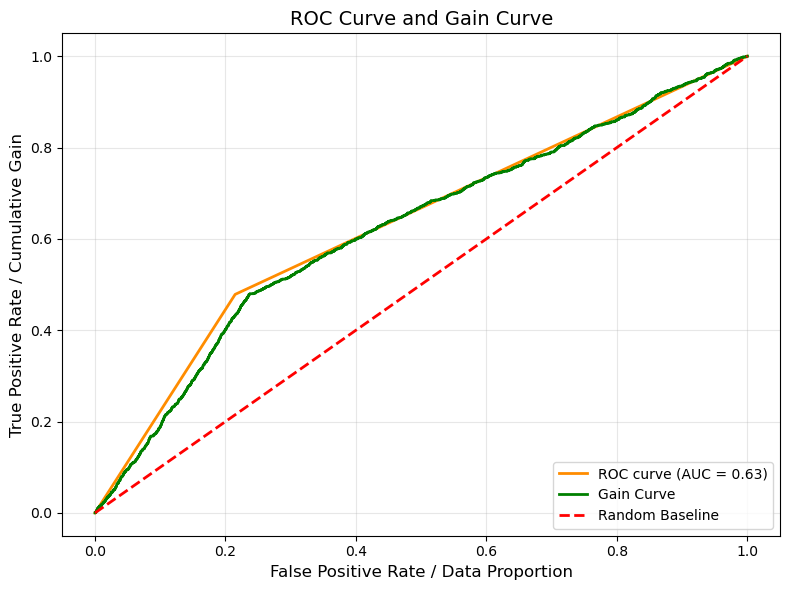

In [55]:
# Sort the predictions for the Gain Curve
sorted_indices = np.argsort(predictions_flat)[::-1]  
sorted_real_values = np.array(real_values)[sorted_indices] 

# Calculate the cumulative gain
cumulative_gain = np.cumsum(sorted_real_values)  
total_positives = np.sum(sorted_real_values)  
cumulative_gain = cumulative_gain / total_positives

# Calculate the random baseline (uniform distribution)
random_gain = np.arange(1, len(sorted_real_values) + 1) / len(sorted_real_values)  

# Plot the ROC curve and Gain Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})') 
plt.plot(np.arange(1, len(sorted_real_values) + 1) / len(sorted_real_values), cumulative_gain, label="Gain Curve", color='green', linewidth=2)  
plt.plot(np.arange(1, len(sorted_real_values) + 1) / len(sorted_real_values), random_gain, label="Random Baseline", linestyle="--", color='red', linewidth=2) 

# Labels and title
plt.xlabel('False Positive Rate / Data Proportion', fontsize=12)  
plt.ylabel('True Positive Rate / Cumulative Gain', fontsize=12)  
plt.title('ROC Curve and Gain Curve', fontsize=14)  
plt.legend(loc="lower right", fontsize=10) 
plt.grid(alpha=0.3)  
plt.tight_layout()
plt.show()  


The joint visualization of the ROC Curve and the Gain Curve is essential for evaluating the model's performance from two complementary perspectives.

As mentioned earlier, the area under the curve (AUC) is 0.63, indicating a moderate model performance, slightly better than random, represented by the diagonal red line. This value reflects that the model has some ability to distinguish between compliant and non-compliant customers, but there is still room for improvement.

On the other hand, the ***Gain Curve***, shown in green, evaluates the accumulated gain achieved by prioritizing customers according to the probability assigned by the model. In this case, the green curve shows that the model identifies a larger proportion of the target customers when analyzing a fraction of the data, although its performance is not significantly high compared to the random baseline. This reinforces the need to optimize the model, either through adjustments in data representation, model architecture, or class balancing.

Together, these metrics highlight that the model has a limited level of effectiveness, being able to distinguish between the classes, but with precision and recall that may be insufficient for critical applications.

## **Final Conclusion**

This practice has allowed for the development and implementation of a complete workflow, covering everything from setting up a reproducible environment using Docker to analyzing and evaluating a predictive model through a Flask API. In the first stage, an efficient and scalable system was established to receive data, process it, and log predictions, laying the foundation for continuous monitoring of the requests made. In the second stage, a detailed analysis of the generated predictions was conducted, evaluating both their distribution and the model's performance through key metrics and visualizations.

While the results show that the model achieves reasonable accuracy by correctly classifying the majority of cases, limitations were also identified, particularly in classifying the less-represented cases. Additionally, the use of dimensionality reduction techniques such as PCA added complexity to the interpretation of the principal components, emphasizing the importance of maintaining a balance between dimensionality reduction and model explainability.